In [1]:
import numpy as np
from matplotlib import pyplot as plt, animation as animation, ticker as mticker
from tqdm.notebook import tqdm

from fireworks.particles import Particles
import fireworks.ic as ic
import fireworks.nbodylib.dynamics as fnd
import fireworks.nbodylib.integrators as fni

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

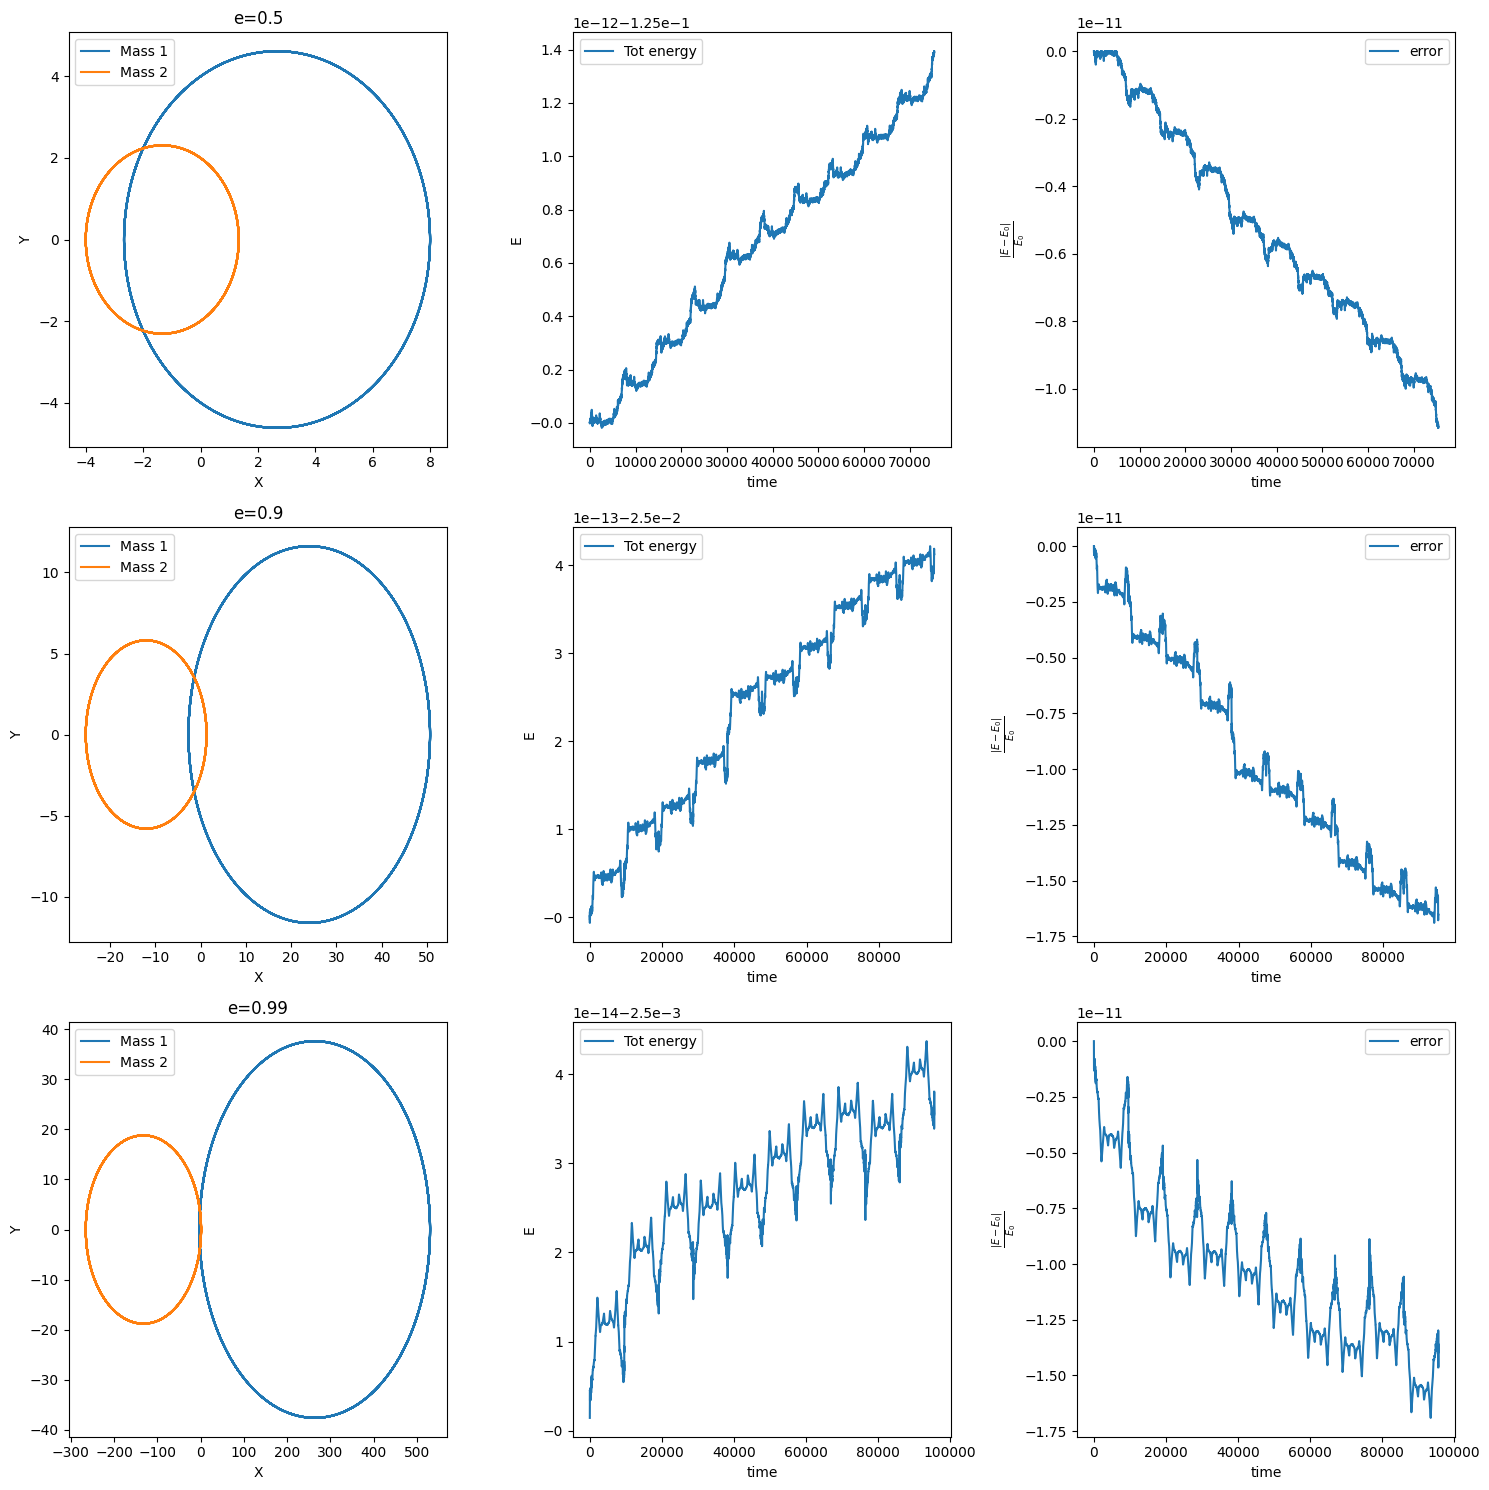

In [3]:
fig = plt.figure(figsize=(15, 15), layout='tight')
iplot = 330
for e in [0.5, 0.9, 0.99]:
    rp = 4
    a = rp / (1 - e)
    particles = ic.ic_two_body(mass1=1., mass2=2, e=e, rp=rp)
    Tperiod = 2 * np.pi * np.sqrt(a**3 / (particles.mass[0] + particles.mass[1]))
    
    tstart=0
    tintermediate=np.linspace(start=0, stop=10*Tperiod, num=100000)
    tcurrent=0
    pos_list=[]
    vel_list=[]
    energy_list=[]
    for t in tqdm(tintermediate):
        tstep=t-tcurrent
        if tstep <=0: continue # continue means go to the next step (i.e. next t in the array)
        particles, efftime,_,_,_= fni.integrator_tsunami(particles,tstep)
        # Save the particles positions and velocities and energy
        pos_list.append(particles.pos.copy())
        vel_list.append(particles.vel.copy())
        Etot, _, _ = particles.Etot()
        energy_list.append(Etot)
        # Here we can save stuff, plot stuff, etc.
        tcurrent=tcurrent+efftime
    
    pos_x_1, pos_y_1 = np.array(pos_list)[:, 0][:, 0], np.array(pos_list)[:, 0][:, 1] 
    pos_x_2, pos_y_2 = np.array(pos_list)[:, 1][:, 0], np.array(pos_list)[:, 1][:, 1] 

    #position plot
    iplot +=1
    ax = fig.add_subplot(iplot)
    ax.plot(pos_x_1, pos_y_1, label=f'Mass 1')
    ax.plot(pos_x_2, pos_y_2, label=f'Mass 2')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'e={e}')
    ax.legend()
    
    #energy plot
    iplot +=1
    ax = fig.add_subplot(iplot)
    ax.plot(energy_list, label='Tot energy')
    ax.set_xlabel('time')
    ax.set_ylabel('E')
    ax.legend()
    
    #energy error
    iplot +=1
    ax = fig.add_subplot(iplot)
    energy_array = np.array(energy_list)
    error = np.abs(energy_array - energy_array[0])/energy_array[0]
    ax.set_xlabel('time')
    ax.plot(error, label='error')
    ax.set_ylabel(r'$\frac{|E-E_0|}{E_0}$')
    ax.legend()

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

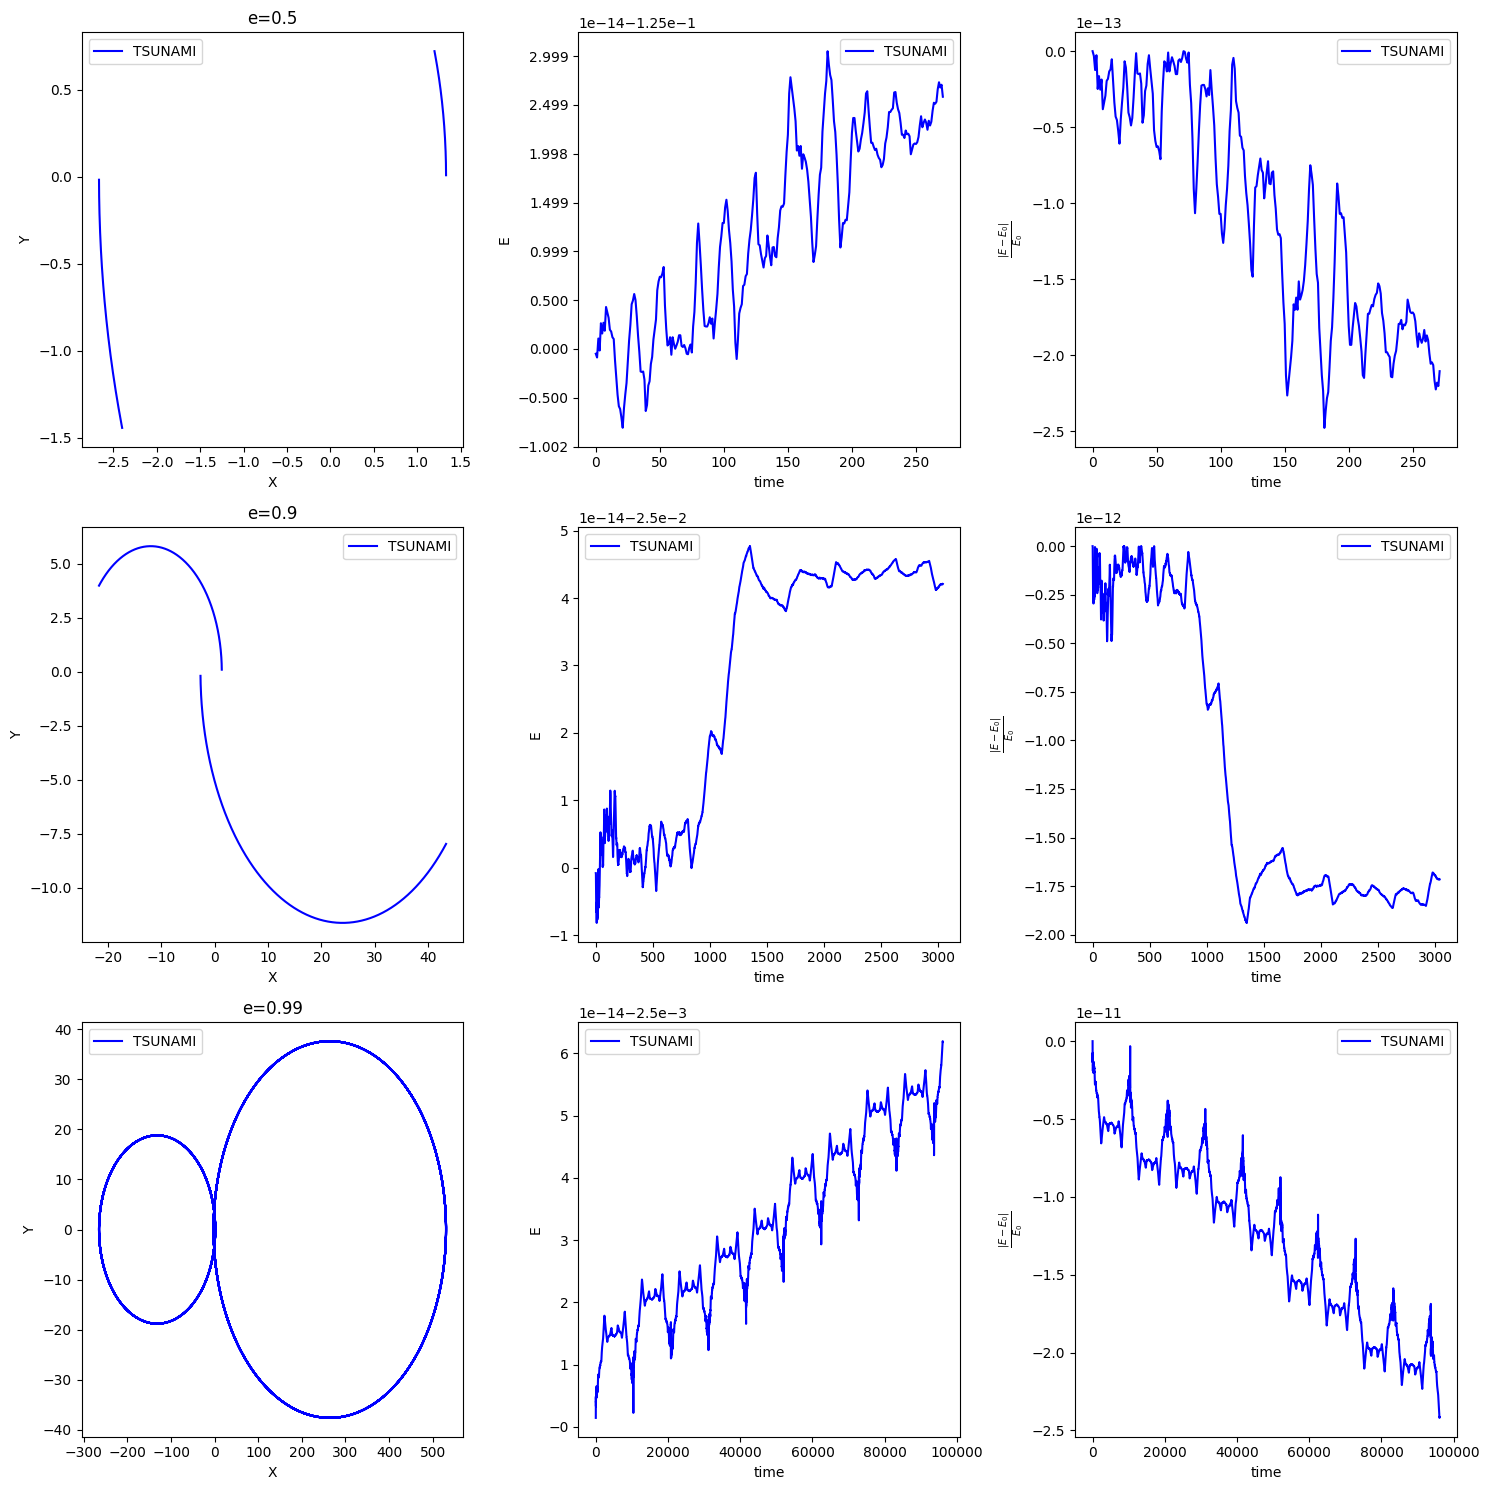

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), layout='tight')

# for func, integrator, color in zip((fni.integrator_tsunami, fni.integrator_leapfrog), ('TSUNAMI', 'leapfrog'), ('blue', 'red')): 
for func, integrator, color in zip((fni.integrator_tsunami,), ('TSUNAMI',), ('blue',)): 

    for row, e in enumerate([0.5, 0.9, 0.99]):

        rp = 4
        a = rp / (1 - e)
        particles = ic.ic_two_body(mass1=1., mass2=2, e=e, rp=rp)
        Tperiod = 2 * np.pi * np.sqrt(a**3 / (particles.mass[0] + particles.mass[1]))
        tstart=0
        tintermediate=np.linspace(start=0, stop=10*Tperiod, num=100000)
        tcurrent=0

        tstart=0
        tintermediate=np.linspace(start=0, stop=10*Tperiod, num=100000)
        tcurrent=0
        pos_list=[]
        vel_list=[]
        energy_list=[]
        for t in tqdm(tintermediate):
            tstep=t-tcurrent
            if integrator=='TSUNAMI':    
            if tstep <=0: continue # continue means go to the next step (i.e. next t in the array)  
            particles,_,_,_,_= func(particles,tstep)
            else:
                particles,_,_,_,_ = func(particles, tstep, fnd.acceleration_direct_vectorized)
            Save the particles positions and velocities and energy
            pos_list.append(particles.pos.copy())
            vel_list.append(particles.vel.copy())
            Etot, _, _ = particles.Etot()
            energy_list.append(Etot)
            # Here we can save stuff, plot stuff, etc.
            tcurrent=tcurrent+efftime
        
        pos_x_1, pos_y_1 = np.array(pos_list)[:, 0][:, 0], np.array(pos_list)[:, 0][:, 1] 
        pos_x_2, pos_y_2 = np.array(pos_list)[:, 1][:, 0], np.array(pos_list)[:, 1][:, 1] 
    
        #position plot
        axs[row, 0].plot(pos_x_1, pos_y_1, label=f'{integrator}', color=f'{color}')
        axs[row, 0].plot(pos_x_2, pos_y_2, color=f'{color}')
        axs[row, 0].set_xlabel('X')
        axs[row, 0].set_ylabel('Y')
        axs[row, 0].set_title(f'e={e}')
        axs[row, 0].legend()
        
        #energy plot
        axs[row, 1].plot(energy_list, label=f'{integrator}', color=f'{color}')
        axs[row, 1].set_xlabel('time')
        axs[row, 1].set_ylabel('E')
        axs[row, 1].legend()
        
        #energy error
        energy_array = np.array(energy_list)
        error = np.abs(energy_array - energy_array[0])/energy_array[0]
        axs[row, 2].set_xlabel('time')
        axs[row, 2].plot(error, label=f'{integrator}', color=f'{color}')
        axs[row, 2].set_ylabel(r'$\frac{|E-E_0|}{E_0}$')
        axs[row, 2].legend()

In [16]:
! python3 tsunami.py

  0%|          | 0/100000 [00:00<?, ?it/s]
Traceback (most recent call last):
  File "/ca23/ext_volume/pod_compastro23/assignment_3/tsunami.py", line 36, in <module>
    particles,_,_,_,_= func(particles,tstep)
TypeError: cannot unpack non-iterable ImportError object
